In [1]:
import sys
import os

# Add src folder to system path
sys.path.append(os.path.abspath("../src"))

In [2]:
from data_loader import load_dataset, show_batch
from classifier import SimpleCNN
from trainer import fit, plot_metrics
from tester import Tester
from utils import predict_image
import torch

# PyTorch
torch.manual_seed(42)
torch.cuda.manual_seed(42)  # For GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
dataset_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train'
augmentation_path = [
    r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\thread_water',
    r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\drowning',
]
augment_categories = ['thread_water', 'drowning']
max_images_per_augment_class = 5878
batch_size = 32
image_size = (128, 128)

In [4]:
train_loader, val_loader = load_dataset(
    dataset_path,
    augmentation_path,
    augment_categories,
    max_images_per_augment_class,
    batch_size,
    image_size,
)

Total subset images: 17634
Training images: 14107
Validation images: 3527


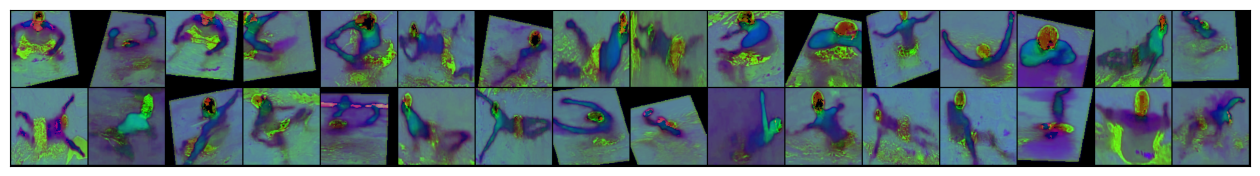

In [5]:
# Check the sizes of the splits
print(f"Total subset images: {len(train_loader.dataset) + len(val_loader.dataset)}")
print(f"Training images: {len(train_loader.dataset)}")
print(f"Validation images: {len(val_loader.dataset)}")

show_batch(train_loader)

In [6]:
num_epoch = 5 
model = SimpleCNN(3)  
lr = 0.001
opt_func = torch.optim.Adam
history = fit(
    num_epoch,
    lr,
    model,
    train_loader,
    val_loader,
    opt_func,
)

Epoch [0], train_loss: 0.5615, train_acc: 0.6687, val_loss: 0.3504, val_acc: 0.8788
Per-class recall:
  Class 0: 0.9020
  Class 1: 0.8388
  Class 2: 0.8876
Per-class accuracy:
  Class 0: 0.9020
  Class 1: 0.8388
  Class 2: 0.8876
Epoch [1], train_loss: 0.2710, train_acc: 0.8857, val_loss: 0.1923, val_acc: 0.9199
Per-class recall:
  Class 0: 0.8366
  Class 1: 0.9587
  Class 2: 0.9210
Per-class accuracy:
  Class 0: 0.8366
  Class 1: 0.9587
  Class 2: 0.9210
Epoch [2], train_loss: 0.2001, train_acc: 0.9126, val_loss: 0.1892, val_acc: 0.9297
Per-class recall:
  Class 0: 0.8808
  Class 1: 0.9230
  Class 2: 0.9506
Per-class accuracy:
  Class 0: 0.8808
  Class 1: 0.9230
  Class 2: 0.9506
Epoch [3], train_loss: 0.1629, train_acc: 0.9328, val_loss: 0.1760, val_acc: 0.9235
Per-class recall:
  Class 0: 0.8289
  Class 1: 0.9487
  Class 2: 0.9408
Per-class accuracy:
  Class 0: 0.8289
  Class 1: 0.9487
  Class 2: 0.9408
Epoch [4], train_loss: 0.1347, train_acc: 0.9385, val_loss: 0.1571, val_acc: 0.9

In [ ]:
plot_metrics(history)

In [ ]:
test_dataset_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\val'

tester = Tester(
    model,
    test_dataset_path,
    batch_size,
    image_size,
)

tester.test()

In [ ]:
try_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\val\drowning\200000.jpg'

label, confidence = predict_image(try_path, model)
print(f"Prediction: {label}, Confidence: {confidence:.2f}")